# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

In [7]:
# load the dataset

df = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")

In [9]:
# Checking 1st 10 rows of the dataset
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [10]:
# Check shape of data

df.shape

(5572, 5)

# Step 3: Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# Dropping unnessary columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
# Changing column names

df.rename(columns={'v1':'Target', 'v2':'Text'},inplace=True)

In [16]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Checking for null values

df.isna().sum()

Target    0
Text      0
dtype: int64

In [18]:
# Checking Duplicate values

df.duplicated().sum()

403

In [19]:
# Drop Duplicate values

df = df.drop_duplicates()

In [20]:
# Converting Target column into numerical 0 and 1

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
# fitting encoder on target column

df['Target']=encoder.fit_transform(df['Target'])

<ipython-input-21-b8230aacbd08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=encoder.fit_transform(df['Target'])


In [22]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Step 4: Exploratory Data Analysis (EDA)

In [24]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# Ham and Spam count

df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

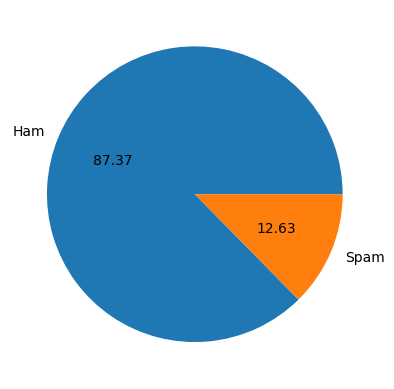

In [26]:
# Check the Target value using pie chart

plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'],autopct='%.2f')
plt.show()

# Step 5: Data Preprocessing

In [27]:
# import nltk library, import stopwords, PorterStemmer, & string

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
# Converting the text in lowercase

def process_text(text):
  text=text.lower()

#tokenization
  text=nltk.word_tokenize(text)

# removing stopwords an punctuation
  x=[]
  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)

  text=x[:]
  x.clear( )

# stemming

  ps=PorterStemmer()
  for i in text:
    x.append(ps.stem(i))


  return " ".join(x)

In [31]:
df['Transformed_text']=df['Text'].apply(process_text)


<ipython-input-31-b77a40c3d7dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text']=df['Text'].apply(process_text)


In [32]:
df.head()

,Target,Text,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though


# Step 5: Model Building

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer(max_features=3000)

In [35]:
# Fit and transform the 'Transformed_text' column

X = tfidf.fit_transform(df['Transformed_text'])

print("Shape of X:", X.shape)

Shape of X: (5169, 3000)


In [36]:
X.shape

(5169, 3000)

In [37]:
y = df['Target'].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X.toarray(),y,test_size=0.2,random_state=2)

In [40]:
# import naive bayes

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

**Gaussian naive bayes classifier**

In [41]:
# fitting data & checking accuracy of GuassianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))

print(precision_score(y_test,y_pred1))

0.8781431334622823
0.5267857142857143


**Bernoulli naive bayes classifier**

In [42]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

print(precision_score(y_test,y_pred2))

0.988394584139265
1.0


**Multinomial naive bayes classifier**

In [43]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))

print(precision_score(y_test,y_pred3))

0.9748549323017408
1.0


# Conclusion:
### Multinomial Naive Bayes model outperforms in spam classification.